# Student alcohol consumption

**Data Set Information**

Secondary school student alcohol consumption data with social, gender and study information. The data were obtained in a survey of students math courses in secondary school. It contains a lot of interesting social, gender and study information about students.

I will be predicting the Final Grade (G3).

I will as well look into the significance of alcohol consumption (Dalc, Walc) regarding the Final Grade.

No missing values.

No possible outliers.

**Attribute Information**

*The inputs are as follows:*

*school* - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

*sex* - student's sex (binary: 'F' - female or 'M' - male)

*age* - student's age (numeric: from 15 to 22)

*address* - student's home address type (binary: 'U' - urban or 'R' - rural)

*famsize* - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

*Pstatus* - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

*Medu* - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

*Fedu* - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

*Mjob* - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

*Fjob* - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

*reason* - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

*guardian* - student's guardian (nominal: 'mother', 'father' or 'other')

*traveltime* - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

*studytime* - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

*failures* - number of past class failures (numeric: n if 1<=n<3, else 4)

*schoolsup* - extra educational support (binary: yes or no)

*famsup* - family educational support (binary: yes or no)

*paid* - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

*activities* - extra-curricular activities (binary: yes or no)

*nursery* - attended nursery school (binary: yes or no)

*higher* - wants to take higher education (binary: yes or no)

*internet* - Internet access at home (binary: yes or no)

*romantic* - with a romantic relationship (binary: yes or no)

*famrel* - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

*freetime* - free time after school (numeric: from 1 - very low to 5 - very high)

*goout* - going out with friends (numeric: from 1 - very low to 5 - very high)

*Dalc* - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

*Walc* - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

*health* - current health status (numeric: from 1 - very bad to 5 - very good)

*absences* - number of school absences (numeric: from 0 to 93)

*The outputs are as follows:*

*G1* - first period grade (numeric: from 0 to 20)

*G2* - second period grade (numeric: from 0 to 20)

*G3* - final grade (numeric: from 0 to 20, output target)

In [1]:
from pyproj import Proj, transform
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource

from itertools import product
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# SkLearn Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Statsmodels
import statsmodels.api as sm

# Tkinter GUI task
import tkinter as tk 

# Random forrest
from sklearn.ensemble import RandomForestRegressor

# Lasso
from sklearn.linear_model import Lasso

In [2]:
# Importing dataset:
d1=pd.read_csv('Duomenys.csv')

In [177]:
# Shape of d1
d1.shape

(395, 33)

In [178]:
# Data type of each column. A lot of categorical variables
d1.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [179]:
# Number of null values.
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

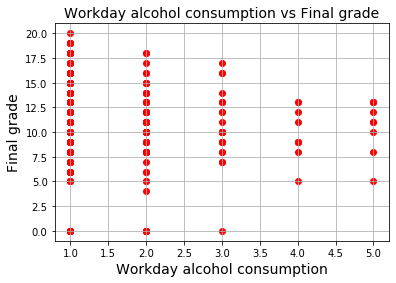

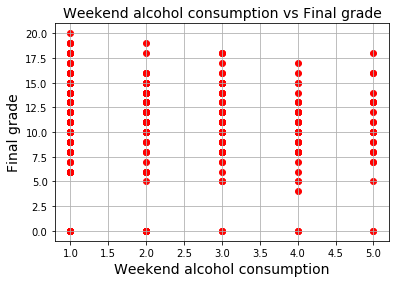

In [21]:
# Check whether a linear relationship exists between:
# - The Final grade (dependent variable) and the Workday alcohol consumption (independent variable); and
# - The Final grade (dependent variable) and the Weekend alcohol consumption (independent variable)

plt.scatter(d1['Dalc'], d1['G3'], color='red')
plt.title('Workday alcohol consumption vs Final grade', fontsize=14)
plt.xlabel('Workday alcohol consumption', fontsize=14)
plt.ylabel('Final grade', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(d1['Walc'], d1['G3'], color='red')
plt.title('Weekend alcohol consumption vs Final grade', fontsize=14)
plt.xlabel('Weekend alcohol consumption', fontsize=14)
plt.ylabel('Final grade', fontsize=14)
plt.grid(True)
plt.show()

Iš grafikų aukščiau kol kas akivaizdžiai matosi, kad aukščiausius pažymius gauna tie, kurie alkoholį darbo dienomis vartoja mažiau. Alkoholio vartojimas savaitgaliais akivaizdaus šablono neturi.

Nemažai atvejų, kai 'alkoholikai' mokosi geriau nei alkoholio beveik nevartojantys.

**Trumpai - iš grafikų dar ne visiškai aišku, kaip (ar) mokslų rezultatai priklauso nuo alkoholio vartojimo.**

In [181]:
# Column list
d1.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

# Tiesionės regresijos modelis

$$\min_w ||Xw - y||^2_2$$

**Modelis be kategorinių kintamųjų**

In [3]:
# Importing dataset:
d1=pd.read_csv('Duomenys.csv')

X = d1[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
 'Dalc', 'Walc', 'health', 'absences']] # G3 kintąjąmjį išmetu, nes jį prognozuoju, G1 ir
# G2 išmetu, nes jų nei prognizuoju, nei jie yra reikšmingi mano modelyje.
# išmetu ir kategorinius kintamuosius
Y = d1['G3'] # Prognozuoju G3

# Test and Train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
 
# With sklearn
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)

print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 15.819972157120654
Coefficients: 
 [-0.37880415  0.31208936  0.07500229 -0.55448176  0.29928308 -1.76279197
  0.2733752   0.27337528 -0.59621525 -0.03262039  0.2911628  -0.11937624
  0.0408884 ]


In [4]:
# With statsmodels
X_train = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

C:\Users\Robertas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     4.830
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           1.16e-07
Time:                        13:19:38   Log-Likelihood:                -901.35
No. Observations:                 316   AIC:                             1831.
Df Residuals:                     302   BIC:                             1883.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.8200      3.748      4.220      0.0

In [5]:
pred = lr.predict(X_test) 

print('RMSE = {0:.02f}'.format(np.sqrt(np.mean(pred - Y_test)**2)))   # pred - y_test

RMSE = 0.59


In [213]:
X_train.columns.tolist()

['const',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

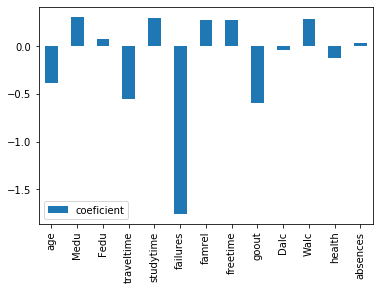

In [6]:
pd.DataFrame(lr.coef_, index=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
 'goout', 'Dalc', 'Walc', 'health', 'absences'], columns=['coeficient']).plot(kind='bar')

Šiuo atveju alkoholio vartojimas nėra pats svarbiausias kintamasis. Darbo dienomis suvartojamas alkoholio kiekis bene nereikšmingiausias kintamasis.

Ypač pažymį lemia nesėkmės įvairiuose atsiskaitymuose mokslo metų eigoje.

**Modelis su kategoriniais kintamaisiais**

In [3]:
# Importing dataset:
d1=pd.read_csv('Duomenys.csv')

# Tvarkau duomenis - dvireikšmius kategorinius kintamuosius.
d1['school'] = d1['school'].map({'GP': 1, 'MS': 0})
d1['sex'] = d1['sex'].map({'M': 1, 'F': 0})
d1['address'] = d1['address'].map({'U': 1, 'R': 0})
d1['famsize'] = d1['famsize'].map({'GT3': 1, 'LE3': 0})
d1['Pstatus'] = d1['Pstatus'].map({'T': 1, 'A': 0})
d1['schoolsup'] = d1['schoolsup'].map({'yes': 1, 'no': 0})
d1['famsup'] = d1['famsup'].map({'yes': 1, 'no': 0})
d1['paid'] = d1['paid'].map({'yes': 1, 'no': 0})
d1['activities'] = d1['activities'].map({'yes': 1, 'no': 0})
d1['nursery'] = d1['nursery'].map({'yes': 1, 'no': 0})
d1['higher'] = d1['higher'].map({'yes': 1, 'no': 0})
d1['internet'] = d1['internet'].map({'yes': 1, 'no': 0})
d1['romantic'] = d1['romantic'].map({'yes': 1, 'no': 0})

In [186]:
# Data type of each column after transformation
d1.dtypes

school         int64
sex            int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

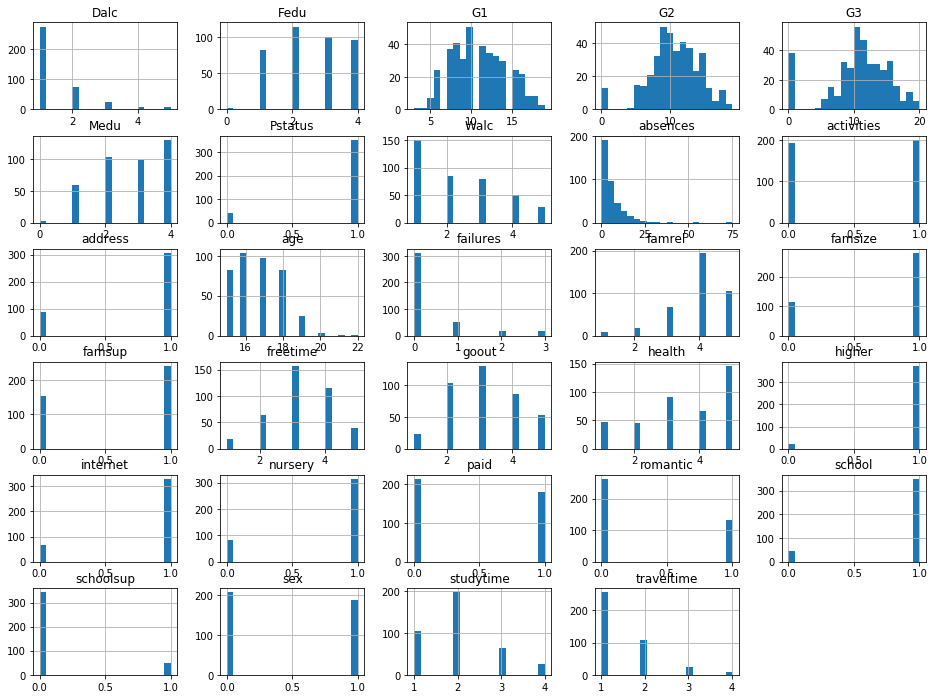

In [240]:
d1.hist(column=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
                'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'] ,bins=20, figsize=(16,12))
plt.show()

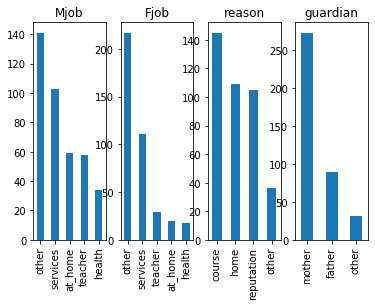

In [188]:
categ = ['Mjob', 'Fjob', 'reason', 'guardian']
fig, ax = plt.subplots(1, len(categ))
for i, categorical_feature in enumerate(d1[categ]):
    d1[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)

In [4]:
#Tvarkau likusius kategorinius kintamuosius.
d1=pd.get_dummies(d1, columns=["Mjob", "Fjob", "reason", "guardian"], prefix=["Mjob", "Fjob", "reason", "guardian"], 
                  drop_first=True)

In [190]:
# Data type of each column after transformation
d1.dtypes

school               int64
sex                  int64
age                  int64
address              int64
famsize              int64
Pstatus              int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
F

In [199]:
# Shape of d1 after transformation
d1.shape

(395, 42)

In [192]:
# Dataset after transformation
d1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,0,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,0,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,0,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,0,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [193]:
# Column list after transformation
d1.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_father',
 'guardian_mother',
 'guardian_other']

In [6]:
X = d1.drop(['G1', 'G2', 'G3'], axis=1) 
Y = d1['G3']

# Test and Train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
 
# With sklearn
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)

print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 16.515547690962336
Coefficients: 
 [-0.6879941   1.98806008 -0.44858168  1.02377142 -0.4594246  -0.46249174
  0.15556825  0.10874881 -0.25653459  0.64556608 -1.65953604 -0.94042591
 -0.69082961  0.21141089 -0.38445894 -0.08279663  1.61339245  0.57459392
 -1.14352202  0.12471082  0.15892007 -0.55238316 -0.17739516  0.13775681
 -0.10665675  0.06565028  0.80648221 -0.16244308  0.45798483 -1.11082653
 -0.85327885 -1.29540106 -0.95306067  0.16368931 -0.14646815  1.62150839
  0.49171218  0.36837628  1.11422649]


In [7]:
# With statsmodels
X_train = sm.add_constant(X_train) # Intercept
 
model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     2.761
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           8.16e-07
Time:                        14:24:16   Log-Likelihood:                -879.15
No. Observations:                 316   AIC:                             1838.
Df Residuals:                     276   BIC:                             1989.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.5155      5.32

C:\Users\Robertas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
pred = lr.predict(X_test) 

print('RMSE = {0:.02f}'.format(np.sqrt(np.mean(pred - Y_test)**2)))   # pred - y_test

RMSE = 0.56


In [221]:
X_train.columns.tolist()

['const',
 'school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other']

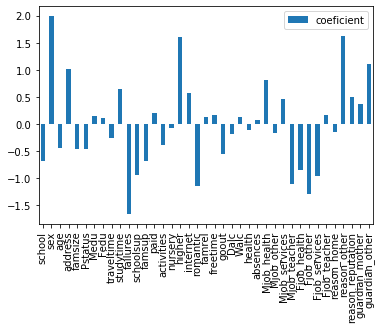

In [12]:
pd.DataFrame(lr.coef_, index=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime',
 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
 'guardian_mother', 'guardian_other'], columns=['coeficient']).plot(kind='bar')

In [ ]:
Ir šiuo atveju alkoholio vartojimas turi bene mažiausiai įtakos galutiniam metiniam pažymiui.

**Modelis, kuriame išmeti *x_other* kintamieji**

In [33]:
X = d1.drop(['G1', 'G2', 'G3', 'Mjob_other', 'Fjob_other', 'reason_other', 'guardian_other'], axis=1) 
Y = d1['G3']

# Test and Train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
 
# With sklearn
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)

print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 15.168860451123779
Coefficients: 
 [-0.77815019  1.92621504 -0.37808336  1.04245448 -0.42162897 -0.48024593
  0.08695737  0.13252828 -0.31454759  0.5869862  -1.62511441 -0.90807696
 -0.68036271  0.27142816 -0.34735577 -0.05269362  1.4880803   0.60136687
 -1.0009617   0.11705264  0.19516531 -0.59671207 -0.07756903  0.07761958
 -0.16121046  0.06983654  1.20972992  0.6981021  -0.90256273  0.50226413
  0.23988597  1.41713774 -0.49899013  0.11604207  0.1096533 ]


In [34]:
pred = lr.predict(X_test) 

print('RMSE = {0:.02f}'.format(np.sqrt(np.mean(pred - Y_test)**2)))

RMSE = 0.45


In [268]:
X_train.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'Mjob_health',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_reputation',
 'guardian_mother']

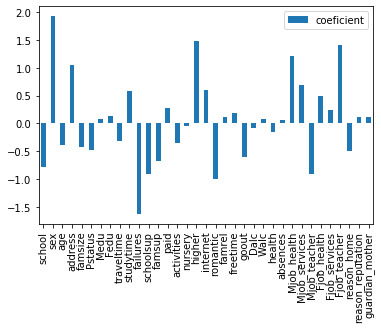

In [17]:
pd.DataFrame(lr.coef_, index=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime',
 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Mjob_health', 'Mjob_services', 'Mjob_teacher',
 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_reputation',
 'guardian_mother'], columns=['coeficient']).plot(kind='bar')

In [19]:
# With statsmodels
X_train = sm.add_constant(X_train) # Intercept
 
model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

# Remove intercept afterwards
X_train= X_train.drop(['const'], axis=1)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     2.907
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           5.62e-07
Time:                        14:28:12   Log-Likelihood:                -882.22
No. Observations:                 316   AIC:                             1836.
Df Residuals:                     280   BIC:                             1972.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.1689      5.04

C:\Users\Robertas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Šiuo atveju alkoholio įtaka nesikeičia.

**Tiesinės regresijos modelio išvados**

Be didesnių duomenų transformacijų RMSE gauname 0.56.

Iš duomenų pašalinę *other* reikšmes, apie kurias, apart kintamojo 'srities', nieko daugiau nežinome, RMSE sumažiname iki 0.45.

**Bnadysiu kurti naujų kintamųjų**

# Apibendrintieji tiesiniai modeliai

**Lasso**

Instead of using simple Linear regression defined by

$$\min_w ||Xw - y||^2_2$$

we will punish model for using large weights by adding additional term

\begin{align}
\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}
\end{align}

In [6]:
from sklearn.linear_model import Lasso

X = d1.drop(['G1', 'G2', 'G3', 'Mjob_other', 'Fjob_other', 'reason_other', 'guardian_other'], axis=1) 
Y = d1['G3']

# Test and Train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

lasso = Lasso() # alpha = 1 by default

lasso.fit(X_train, Y_train)

train_score=lasso.score(X_train,Y_train)
test_score=lasso.score(X_test,Y_test)
coeff_used = np.sum(lasso.coef_!=0)

print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
# ----------------------------------------------
lasso001 = Lasso(alpha=0.01, max_iter=10e5)

lasso001.fit(X_train,Y_train)

train_score001=lasso001.score(X_train,Y_train)
test_score001=lasso001.score(X_test,Y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
# -----------------------------------------------
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)

lasso00001.fit(X_train,Y_train)

train_score00001=lasso00001.score(X_train,Y_train)
test_score00001=lasso00001.score(X_test,Y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
# -------------------------------------------------
lr = linear_model.LinearRegression()

lr.fit(X_train, Y_train)

lr_train_score=lr.score(X_train,Y_train)
lr_test_score=lr.score(X_test,Y_test)

print ("LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)


training score: 0.03997354304075429
test score:  0.014858917050669551
number of features used:  3
training score for alpha=0.01: 0.2653905360700839
test score for alpha =0.01:  0.18213635309858467
number of features used: for alpha =0.01: 33
training score for alpha=0.0001: 0.2665386915329989
test score for alpha =0.0001:  0.1896050851201423
number of features used: for alpha =0.0001: 35
LR training score: 0.26653881112228806
LR test score:  0.1896712180937996


Pagal *training score* ir *test score* matome, kad Lasso modelis, kai alpha =0.001 duoda beveik identiškus rezultatus. Regresijai yra panaudojami 35 iš 35 galimų kintamųjų.

Reikia patikrinti modelio RMSE.

In [76]:
d1_scaled = d1
d1_scaled = (d1_scaled - mean) / std

X_scaled = d1_scaled.drop(['G1', 'G2', 'G3', 'Mjob_other', 'Fjob_other', 'reason_other', 'guardian_other'], axis=1) 
Y_scaled = d1_scaled['G3']

# Test and Train data
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size = .20, random_state = 40)

mean = Y_scaled_train.mean()
std = Y_scaled_train.std()

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)

lasso00001.fit(X_scaled_train,Y_scaled_train)

pred = lasso00001.predict(X_scaled_test)
pred = pred * Y_scaled_train.std() + Y_scaled_train.mean()
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean(pred - Y_scaled_test)**2)))

RMSE = 0.10


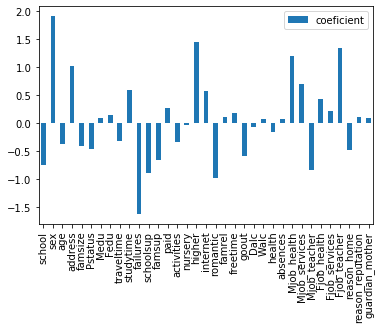

In [78]:
pd.DataFrame(lasso00001.coef_, index=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime',
 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Mjob_health', 'Mjob_services', 'Mjob_teacher',
 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_reputation',
 'guardian_mother'], columns=['coeficient']).plot(kind='bar')

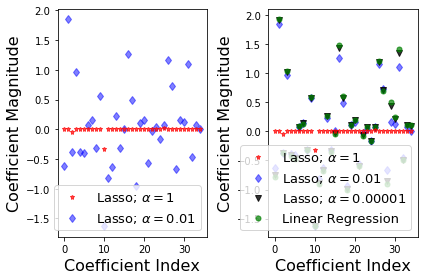

In [79]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

# Random Forrest

In [73]:
X = d1.drop(['G1', 'G2', 'G3', 'Mjob_other', 'Fjob_other', 'reason_other', 'guardian_other'], axis=1) 
Y = d1['G3']

# Test and Train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)
pred = rf.predict(X_test)
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - Y_test)**2))))

RMSE = 3.80


# Tiesinės regresijos modelio GUI - nuspėkime naują galutinį pažymį, žinodami naujus duomenis.

In [7]:
# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 1000, height = 600)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', lr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(270, 420, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', lr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(270, 480, window=label_Coefficients)

# New_school label and input box
label1 = tk.Label(root, text='Type in School: ')
canvas1.create_window(100, 40, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 40, window=entry1)

label2 = tk.Label(root, text=' Type in student sex: ')
canvas1.create_window(100, 60, window=label2)

entry2 = tk.Entry (root) 
canvas1.create_window(270, 60, window=entry2)

label3 = tk.Label(root, text='Type in age: ')
canvas1.create_window(100, 80, window=label3)

entry3 = tk.Entry (root) 
canvas1.create_window(270, 80, window=entry3)

label4 = tk.Label(root, text='Type in address: ')
canvas1.create_window(100, 100, window=label4)

entry4 = tk.Entry (root) 
canvas1.create_window(270, 100, window=entry4)

label5 = tk.Label(root, text='Type in famsize: ')
canvas1.create_window(100, 120, window=label5)

entry5 = tk.Entry (root) 
canvas1.create_window(270, 120, window=entry5)

label6 = tk.Label(root, text='Type in Pstatus: ')
canvas1.create_window(100, 140, window=label6)

entry6 = tk.Entry (root) 
canvas1.create_window(270, 140, window=entry6)

label7 = tk.Label(root, text='Type in Medu: ')
canvas1.create_window(100, 160, window=label7)

entry7 = tk.Entry (root) 
canvas1.create_window(270, 160, window=entry7)

label8 = tk.Label(root, text='Type in Fedu: ')
canvas1.create_window(100, 180, window=label8)

entry8 = tk.Entry (root) 
canvas1.create_window(270, 180, window=entry8)

label9 = tk.Label(root, text='Type in traveltime: ')
canvas1.create_window(100, 200, window=label9)

entry9 = tk.Entry (root) 
canvas1.create_window(270, 200, window=entry9)

label10 = tk.Label(root, text='Type in studytime: ')
canvas1.create_window(100, 220, window=label10)

entry10 = tk.Entry (root) 
canvas1.create_window(270, 220, window=entry10)

label11 = tk.Label(root, text='Type in failures: ')
canvas1.create_window(100, 240, window=label11)

entry11 = tk.Entry (root) 
canvas1.create_window(270, 240, window=entry11)

label12 = tk.Label(root, text='Type in schoolsup: ')
canvas1.create_window(100, 260, window=label12)

entry12 = tk.Entry (root) 
canvas1.create_window(270, 260, window=entry12)

label13 = tk.Label(root, text='Type in famsup: ')
canvas1.create_window(100, 280, window=label13)

entry13 = tk.Entry (root) 
canvas1.create_window(270, 280, window=entry13)

label14 = tk.Label(root, text='Type in paid: ')
canvas1.create_window(100, 300, window=label14)

entry14 = tk.Entry (root) 
canvas1.create_window(270, 300, window=entry14)

label15 = tk.Label(root, text='Type in activities: ')
canvas1.create_window(100, 320, window=label15)

entry15 = tk.Entry (root) 
canvas1.create_window(270, 320, window=entry15)

label16 = tk.Label(root, text='Type in nursery: ')
canvas1.create_window(100, 340, window=label16)

entry16 = tk.Entry (root) 
canvas1.create_window(270, 340, window=entry16)

label17 = tk.Label(root, text='Type in higher: ')
canvas1.create_window(100, 360, window=label17)

entry17 = tk.Entry (root) 
canvas1.create_window(270, 360, window=entry17)

label18 = tk.Label(root, text='Type in internet: ')
canvas1.create_window(100, 380, window=label18)

entry18 = tk.Entry (root) 
canvas1.create_window(270, 380, window=entry18)

label19 = tk.Label(root, text='Type in romantic: ')
canvas1.create_window(540, 40, window=label19)

entry19 = tk.Entry (root) 
canvas1.create_window(710, 40, window=entry19)

label20 = tk.Label(root, text='Type in famrel: ')
canvas1.create_window(540, 60, window=label20)

entry20 = tk.Entry (root) 
canvas1.create_window(710, 60, window=entry20)

label21 = tk.Label(root, text='Type in freetime: ')
canvas1.create_window(540, 80, window=label21)

entry21 = tk.Entry (root) 
canvas1.create_window(710, 80, window=entry21)

label22 = tk.Label(root, text='Type in goout: ')
canvas1.create_window(540, 100, window=label22)

entry22 = tk.Entry (root) 
canvas1.create_window(710, 100, window=entry22)

label23 = tk.Label(root, text='Type in Dalc: ')
canvas1.create_window(540, 120, window=label23)

entry23 = tk.Entry (root) 
canvas1.create_window(710, 120, window=entry23)

label24 = tk.Label(root, text='Type in Walc: ')
canvas1.create_window(540, 140, window=label24)

entry24 = tk.Entry (root) 
canvas1.create_window(710, 140, window=entry24)

label25 = tk.Label(root, text='Type in health: ')
canvas1.create_window(540, 160, window=label25)

entry25 = tk.Entry (root) 
canvas1.create_window(710, 160, window=entry25)

label26 = tk.Label(root, text='Type in absences: ')
canvas1.create_window(540, 180, window=label26)

entry26 = tk.Entry (root) 
canvas1.create_window(710, 180, window=entry26)

label27 = tk.Label(root, text='Type in Mjob_health: ')
canvas1.create_window(540, 200, window=label27)

entry27 = tk.Entry (root) 
canvas1.create_window(710, 200, window=entry27)

label28 = tk.Label(root, text='Type in Mjob_services: ')
canvas1.create_window(540, 220, window=label28)

entry28 = tk.Entry (root) 
canvas1.create_window(710, 220, window=entry28)

label29 = tk.Label(root, text='Type in Mjob_teacher: ')
canvas1.create_window(540, 240, window=label29)

entry29 = tk.Entry (root) 
canvas1.create_window(710, 240, window=entry29)

label30 = tk.Label(root, text='Type in Fjob_health: ')
canvas1.create_window(540, 260, window=label30)

entry30 = tk.Entry (root) 
canvas1.create_window(710, 260, window=entry30)

label31 = tk.Label(root, text='Type in Fjob_services: ')
canvas1.create_window(540, 280, window=label31)

entry31 = tk.Entry (root) 
canvas1.create_window(710, 280, window=entry31)

label32 = tk.Label(root, text='Type in Fjob_teacher: ')
canvas1.create_window(540, 300, window=label32)

entry32 = tk.Entry (root) 
canvas1.create_window(710, 300, window=entry32)

label33 = tk.Label(root, text='Type in reason_home: ')
canvas1.create_window(540, 320, window=label33)

entry33 = tk.Entry (root) 
canvas1.create_window(710, 320, window=entry33)

label34 = tk.Label(root, text='Type in reason_reputation: ')
canvas1.create_window(540, 340, window=label34)

entry34 = tk.Entry (root) 
canvas1.create_window(710, 340, window=entry34)

label35 = tk.Label(root, text='Type in guardian_mother: ')
canvas1.create_window(540, 360, window=label35)

entry35 = tk.Entry (root) 
canvas1.create_window(710, 360, window=entry35)

def values(): 
    global new_school #our 1st input variable
    new_school = entry1.get()
    
    global new_sex
    new_sex = entry2.get()
    
    global new_age
    new_age = entry3.get()
    
    global new_address
    new_address = entry4.get()
    
    global new_famsize
    new_famsize = entry5.get()
    
    global new_Pstatus
    new_Pstatus = entry6.get() 
    
    global new_Medu
    new_Medu = entry7.get() 
    
    global new_Fedu
    new_Fedu = entry8.get()
    
    global new_traveltime
    new_traveltime = entry9.get()
    
    global new_studytime
    new_studytime = entry10.get() 
    
    global new_failures
    new_failures = entry11.get() 
    
    global new_schoolsup
    new_schoolsup= entry12.get() 
    
    global new_famsup
    new_famsup = entry13.get() 
    
    global new_paid
    new_paid= entry14.get() 
    
    global new_activities
    new_activities = entry15.get() 
    
    global new_nursery
    new_nursery = entry16.get() 
    
    global new_higher
    new_higher = entry17.get() 
    
    global new_internet
    new_internet = entry18.get() 
    
    global new_romantic
    new_romantic = entry19.get()
    
    global new_famrel
    new_famrel = entry20.get()
    
    global new_freetime
    new_freetime = entry21.get()
    
    global new_goout
    new_goout = entry22.get()
    
    global new_Dalc
    new_Dalc = entry23.get()
    
    global new_Walc
    new_Walc = entry24.get()
    
    global new_health
    new_health = entry25.get()
    
    global new_absences
    new_absences = entry26.get()
    
    global new_Mjob_health
    new_Mjob_health = entry27.get()
    
    global new_Mjob_services
    new_Mjob_services = entry28.get()
    
    global new_Mjob_teacher
    new_Mjob_teacher = entry29.get()
    
    global new_Fjob_health
    new_Fjob_health = entry30.get()
    
    global new_Fjob_services
    new_Fjob_services = entry31.get()
   
    global new_Fjob_teacher
    new_Fjob_teacher = entry32.get()
    
    global new_reason_home
    new_reason_home = entry33.get()
    
    global new_reason_reputation
    new_reason_reputation = entry34.get()
    
    global new_guardian_mother
    new_guardian_mother = entry35.get()
    
    
    Prediction_result  = ('Predicted Final Grade: ', lr.predict([[lr.intercept_, new_school, new_sex, new_age, new_address, new_famsize, 
                                                                  new_Pstatus, new_Medu, new_Fedu, new_traveltime, 
                                                                  new_studytime, new_failures, new_schoolsup, new_famsup, 
                                                                  new_paid, new_activities, new_nursery, new_higher,
                                                                  new_internet, new_romantic, new_famrel, new_freetime, 
                                                                  new_goout, new_Dalc, new_Walc, new_health, new_absences, 
                                                                  new_Mjob_health, new_Mjob_services, new_Mjob_teacher, 
                                                                  new_Fjob_health, new_Fjob_services, new_Fjob_teacher, 
                                                                  new_reason_home, new_reason_reputation, new_guardian_mother]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(710, 460, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Final Grade',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(710, 420, window=button1)
 

root.mainloop()

C:\Users\Robertas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Robertas\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-7-f20f02916ad7>", line 343, in values
    new_reason_home, new_reason_reputation, new_guardian_mother]]))
  File "C:\Users\Robertas\Anaconda3\lib\site-packages\sklearn\linear_model\base.py", line 221, in predict
    return self._decision_function(X)
  File "C:\Users\Robertas\Anaconda3\lib\site-packages\sklearn\linear_model\base.py", line 206, in _decision_function
    dense_output=True) + self.intercept_
  File "C:\U

Klausimai:

1) Kaip kurti naujus kintamuosius, kai pagrinde duomenis sutaro kategoriniai kintamieji?
2) Lasso regresijos confirmation, ar ten logiška? Kodėl RMSE toks mažas?
3) Kodėl Random Forrest duoda žymiai didesnį RMSE?
4) Regresijos GUI errorai?